In [1]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import statsmodels.stats.power as smp
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

https://docs.scipy.org/doc/scipy/reference/stats.html

https://www.statsmodels.org/stable/stats.html

In [2]:
path = '/home/lean/Documentos/Lean/SBG/Base_de_calcio/DiversidadConformacionalCBS/MCU/cavidb/'
cavidb_modelos = pd.read_json(path + 'af.results_lean.json')
cavidb_modelos.head()
# cavidb_modelos.to_csv(path + 'cavidb.csv')

,_id,pdb_id,chain_id,model_id,uniprot_id,seqres_id,ocid,sequence,global_descriptors,peptide_descriptors,...,max_pocket_length,pdb_file,resolution,structure_method,missing_residues,missing_residues_count,mean_aggrescan_score,links,updated_at,updated_in
0,644d8316fa890b0d12397094,4nsc,A,F283L_MODEL_1,NaN,NaN,42X6YZOL2WP7GUREL0QHUTQN7NVYCXC4EC0143T8K5X2NA...,MFRLNSLSALAELAVGSRWYHGGSQPIQIRRRLMMVAFLGASAVTA...,"{'isoelectric_point': 6, 'instability_index': ...","{'aa_selectivity_index': 2.5, 'argos_hydrophob...",...,30,ATOM 1 N MET A 1 34.812 -54.469...,NaN,unknown,[],0,-0.972525,"[[25, KAK, 0.48387096774193505], [42, KAM, 0.4...",2023-04-29 17:50:30.018000+00:00,mumuki
1,644d806efa890b0d12396edf,4nsc,A,F283L_MODEL_4,NaN,NaN,42X6YZOL2WP7GUREL0QHUTQN7NWHV9ACEC0143T8K5X2NA...,MFRLNSLSALAELAVGSRWYHGGSQPIQIRRRLMMVAFLGASAVTA...,"{'isoelectric_point': 6, 'instability_index': ...","{'aa_selectivity_index': 2.5, 'argos_hydrophob...",...,28,ATOM 1 N MET A 1 -23.422 -31.594...,NaN,unknown,[],0,-1.029622,"[[44, KAM, 0.5882352941176471], [42, KAA, 0.33...",2023-04-29 17:39:10.840000+00:00,mumuki
2,644d8065fa890b0d12396ed5,4nsc,A,F283L_MODEL_3,NaN,NaN,42X6YZOL2WP7GUREL0QHUTQN7NVOLRD0EC0143T8K5X2NA...,MFRLNSLSALAELAVGSRWYHGGSQPIQIRRRLMMVAFLGASAVTA...,"{'isoelectric_point': 6, 'instability_index': ...","{'aa_selectivity_index': 2.5, 'argos_hydrophob...",...,30,ATOM 1 N MET A 1 -36.594 -24.219...,NaN,unknown,[],0,-1.044212,"[[52, KAS, 0.74074074074074], [48, KAM, 0.5454...",2023-04-29 17:39:01.500000+00:00,mumuki
3,644d8046fa890b0d12396ebf,4nsc,A,F283L_MODEL_5,NaN,NaN,42X6YZOL2WP7GUREL0QHUTQN7NW843B8EC0143T8K5X2NB...,MFRLNSLSALAELAVGSRWYHGGSQPIQIRRRLMMVAFLGASAVTA...,"{'isoelectric_point': 6, 'instability_index': ...","{'aa_selectivity_index': 2.5, 'argos_hydrophob...",...,25,ATOM 1 N MET A 1 47.406 -16.438...,NaN,unknown,[],0,-1.025511,"[[25, KAT, 0.555555555555555], [12, KAL, 0.469...",2023-04-29 17:38:30.008000+00:00,mumuki
4,644d8028fa890b0d12396eac,4nsc,A,F283L_MODEL_2,NaN,NaN,42X6YZOL2WP7GUREL0QHUTQN7NVEULDWEC0143T8K5X2NA...,MFRLNSLSALAELAVGSRWYHGGSQPIQIRRRLMMVAFLGASAVTA...,"{'isoelectric_point': 6, 'instability_index': ...","{'aa_selectivity_index': 2.5, 'argos_hydrophob...",...,34,ATOM 1 N MET A 1 79.812 15.781...,NaN,unknown,[],0,-0.958841,"[[38, KAG, 0.5454545454545451], [33, KAM, 0.4]...",2023-04-29 17:38:00.485000+00:00,mumuki


In [3]:
cavidb_modelos.columns

Index(['_id', 'pdb_id', 'chain_id', 'model_id', 'uniprot_id', 'seqres_id',
       'ocid', 'sequence', 'global_descriptors', 'peptide_descriptors',
       'fraction_of_expanding_residues', 'all_phosphorylatable_sites',
       'length', 'net_charge', 'count_negative_res', 'count_positive_res',
       'count_neutral_res', 'fraction_of_negative_residues',
       'fraction_of_positive_residues', 'aa_fraction_residues',
       'mean_net_charge', 'delta_value', 'delta_max_value',
       'fraction_of_aa_promoting_disorder_residues', 'count_amino_acids',
       'get_amino_acids_percent', 'molecular_weight', 'helix_fraction',
       'turn_fraction', 'sheet_fraction',
       'reduced_molar_extinction_coefficient',
       'oxidized_molar_extinction_coefficient', 'alphafold',
       'radius_of_gyration', 'pockets', 'pykvfinder_pockets', 'residues',
       'created_at', 'created_in', 'pockets_count', 'druggable_pockets_count',
       'lowest_residue_position', 'highest_residue_position',
       'max

In [4]:
pockets_table = pd.DataFrame(cavidb_modelos['pockets'].values.tolist(),index=cavidb_modelos['pdb_id'] + '_' + cavidb_modelos['model_id'])
appended_data = []
for i in range(len(pockets_table.columns)):
    df = pd.json_normalize(pockets_table[i])
    df.insert(loc=0, column='prot_id', value=cavidb_modelos['pdb_id'] + '_' + cavidb_modelos['model_id'])
    appended_data.append(df)
pockets_measurements = pd.concat(appended_data)
pockets_measurements.to_csv(path + 'pockets_measurements')

In [5]:
cavidb_modelos_sampling = cavidb_modelos.sample(n = 10)

In [6]:
pdb_4nsc = cavidb_modelos[cavidb_modelos['pdb_id']=='4nsc']
pdb_4nsd = cavidb_modelos[cavidb_modelos['pdb_id']=='4nsd']

In [8]:
ss.shapiro(pockets_measurements_drugpockets['mean_alpha_sphere_solvent_accessibility'])

ShapiroResult(statistic=0.9344154000282288, pvalue=0.12238271534442902)

In [7]:
pockets_measurements_drugpockets = pockets_measurements[pockets_measurements['drug_score']>0.5]

In [9]:
pockets_measurements.columns

Index(['prot_id', 'pocket_id', 'pocket_score', 'drug_score',
       'mean_alpha_sphere_radius', 'mean_alpha_sphere_solvent_accessibility',
       'mean_b_factor', 'hydrophobicity_score', 'polarity_score',
       'amino_acid_volume_score', 'monte_carlo_volume', 'convex_hull_volume',
       'charge_score', 'local_hydrophobic_density_score', 'residues',
       'positions', 'pocket_sequence', 'length', 'net_charge',
       'count_negative_res', 'count_positive_res', 'count_neutral_res',
       'fraction_of_negative_residues', 'fraction_of_positive_residues',
       'mean_net_charge', 'delta_value', 'delta_max_value',
       'fraction_of_aa_promoting_disorder_residues', 'pqr_file',
       'aa_fraction_residues.A', 'aa_fraction_residues.C',
       'aa_fraction_residues.D', 'aa_fraction_residues.E',
       'aa_fraction_residues.F', 'aa_fraction_residues.G',
       'aa_fraction_residues.H', 'aa_fraction_residues.I',
       'aa_fraction_residues.K', 'aa_fraction_residues.L',
       'aa_fraction

In [10]:
numero_buscado = 421
filtro = pockets_measurements['positions'].apply(lambda lista: numero_buscado in lista if isinstance(lista, list) else False)
resultados_filtrados = pockets_measurements[filtro]
resultados_filtrados

,prot_id,pocket_id,pocket_score,drug_score,mean_alpha_sphere_radius,mean_alpha_sphere_solvent_accessibility,mean_b_factor,hydrophobicity_score,polarity_score,amino_acid_volume_score,...,aa_fraction_residues.M,aa_fraction_residues.N,aa_fraction_residues.P,aa_fraction_residues.Q,aa_fraction_residues.R,aa_fraction_residues.S,aa_fraction_residues.T,aa_fraction_residues.V,aa_fraction_residues.W,aa_fraction_residues.Y
20,4nsd_218D_MODEL_4,5.0,-0.0149,0.0001,3.9843,0.5498,0.7633,4.5556,6.0,3.6667,...,0.000000,0.111111,0.0,0.000000,0.000000,0.111111,0.0,0.000000,0.0,0.0
12,4nsc_F282S_MODEL_4,6.0,0.0328,0.0004,3.8904,0.7230,0.8532,-12.2857,5.0,3.4286,...,0.000000,0.000000,0.0,0.142857,0.000000,0.000000,0.0,0.000000,0.0,0.0
17,4nsd_F282S_MODEL_4,6.0,0.0328,0.0004,3.8902,0.7230,0.8532,-12.2857,5.0,3.4286,...,0.000000,0.000000,0.0,0.142857,0.000000,0.000000,0.0,0.000000,0.0,0.0
12,4nsc_F282S_MODEL_4,9.0,-0.0050,0.0003,3.9304,0.5028,0.7523,8.1875,10.0,3.5000,...,0.000000,0.125000,0.0,0.000000,0.000000,0.125000,0.0,0.000000,0.0,0.0
17,4nsd_F282S_MODEL_4,9.0,-0.0050,0.0003,3.9304,0.5028,0.7523,8.1875,10.0,3.5000,...,0.000000,0.125000,0.0,0.000000,0.000000,0.125000,0.0,0.000000,0.0,0.0
6,4nsc_F282S_MODEL_3,10.0,0.0323,0.0002,4.0548,0.5627,0.7829,4.5556,6.0,3.6667,...,0.000000,0.111111,0.0,0.000000,0.000000,0.111111,0.0,0.000000,0.0,0.0
22,4nsd_F282L_MODEL_3,10.0,0.0323,0.0002,4.0548,0.5627,0.7829,4.5556,6.0,3.6667,...,0.000000,0.111111,0.0,0.000000,0.000000,0.111111,0.0,0.000000,0.0,0.0
8,4nsc_F282S_MODEL_1,11.0,0.0272,0.0000,4.0778,0.5786,0.7293,4.5556,6.0,3.6667,...,0.000000,0.111111,0.0,0.000000,0.000000,0.111111,0.0,0.000000,0.0,0.0
21,4nsd_F283L_MODEL_2,11.0,-0.0160,0.0009,4.0727,0.6122,0.8391,12.2222,4.0,3.3333,...,0.000000,0.000000,0.0,0.111111,0.000000,0.000000,0.0,0.000000,0.0,0.0
0,4nsc_F283L_MODEL_1,13.0,0.0368,0.0000,3.9906,0.5843,0.7338,4.5556,6.0,3.6667,...,0.000000,0.111111,0.0,0.000000,0.000000,0.111111,0.0,0.000000,0.0,0.0


In [11]:
pockets_measurements_drugpockets[['prot_id', 'pocket_id','positions', 'pocket_sequence']]

,prot_id,pocket_id,positions,pocket_sequence
0,4nsc_F283L_MODEL_1,1.0,"[136, 144, 146, 174, 175, 176, 177, 180, 184, ...",VEFKRFDKEREFLGECLSSDTLKGLCSA
3,4nsc_F283L_MODEL_5,1.0,"[207, 210, 211, 243, 247, 251, 270, 273, 274, ...",SIFFQRLGLCLTFL
7,4nsd_F283L_MODEL_5,1.0,"[207, 210, 211, 243, 247, 251, 270, 273, 274, ...",SIFFQRLGLCLTFL
0,4nsc_F283L_MODEL_1,2.0,"[113, 116, 119, 120, 121, 127, 155, 156, 158, ...",ENRAYISIPNYMAYSGVSLKQMRGLEKPKR
1,4nsc_F283L_MODEL_4,2.0,"[207, 210, 211, 240, 243, 244, 247, 248, 251, ...",SIFMFEQSRDLKSGLCLTFLL
5,4nsd_F283L_MODEL_4,2.0,"[207, 210, 211, 240, 243, 244, 247, 248, 251, ...",SIFMFEQSRDLKSGLCLTFLL
10,4nsc_F282S_MODEL_5,2.0,"[216, 304, 305, 308, 311, 334, 365, 368, 369, ...",LQHLEYEFTKRLR
16,4nsd_F282S_MODEL_2,2.0,"[116, 119, 120, 124, 127, 155, 156, 158, 159, ...",NRAPISIPNYITTRMGHLAYGVSLQRGLK
19,4nsd_F282S_MODEL_5,2.0,"[216, 304, 305, 308, 311, 334, 365, 368, 369, ...",LQHLEYEFTKRLR
21,4nsd_F283L_MODEL_2,5.0,"[113, 116, 117, 119, 120, 121, 124, 127, 155, ...",ENRRAYPISIPNYITTMGLYGVSLRGLK


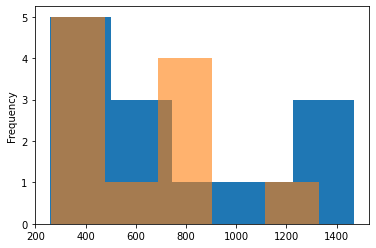

In [12]:
x = pockets_measurements_drugpockets[pockets_measurements_drugpockets['prot_id'].str.contains('4nsc')]['monte_carlo_volume']
y = pockets_measurements_drugpockets[pockets_measurements_drugpockets['prot_id'].str.contains('4nsd')]['monte_carlo_volume']
plt.hist(x, bins=5)
plt.hist(y, bins=5,alpha=0.6)

plt.ylabel('Frequency');

In [13]:
print('means',x.mean(),y.mean())
print('medians',x.median(),y.median())

means 747.7158461538462 602.3624090909091
medians 688.8741 523.0099


In [14]:
ss.ttest_ind(x, y, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
# ss.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=0.954495330647674, pvalue=0.350204064405901)

In [15]:
ss.wilcoxon(x, y=None, zero_method='wilcox', correction=False, alternative='two-sided')

WilcoxonResult(statistic=0.0, pvalue=0.000244140625)

# Residues data

In [16]:
pockets_table = pd.DataFrame(cavidb_modelos['residues'].values.tolist(),index=cavidb_modelos['pdb_id'] + '_' + cavidb_modelos['model_id'])
appended_data = []
for i in range(len(pockets_table.columns)):
    df = pd.json_normalize(pockets_table[i])
    df.insert(loc=0, column='prot_id', value=cavidb_modelos['pdb_id'] + '_' + cavidb_modelos['model_id'])
    appended_data.append(df)
residues_measurements = pd.concat(appended_data)
# residues_measurements.to_csv(path + 'pockets_measurements')

In [17]:
# residues_measurements.to_csv(path + 'residues_all.csv')

In [18]:
residues_measurements.columns

Index(['prot_id', 'position', 'pocket_ids', 'pykvfinder_pocket_ids',
       'secondary_structure', 'ASA', 'aa', 'aa_unicode', 'fcr', 'ncpr',
       'complexity', 'hydropathy', 'aggrescan_score', 'SCHBOND_count',
       'BBHBond_count', 'COULOMBIC_count', 'pka', 'pka_shift', 'buried',
       'COULOMBIC_sum', 'BBHBond_sum', 'SCHBOND_sum', 'net_pka_shift'],
      dtype='object')

In [19]:
residues_measurements['zscore_ASA'] = abs(ss.zscore(residues_measurements['ASA']))

In [20]:
x = residues_measurements[residues_measurements['prot_id'].str.contains('4nsc')]
y = residues_measurements[residues_measurements['prot_id'].str.contains('4nsd')]
# plt.hist(x, bins=100)
# plt.hist(y, bins=100,alpha=0.6)
# plt.ylabel('Frequency');

In [21]:
residues_measurements.describe()

,position,ASA,fcr,ncpr,complexity,hydropathy,aggrescan_score,SCHBOND_count,BBHBond_count,COULOMBIC_count,pka,pka_shift,buried,net_pka_shift,zscore_ASA
count,11900.000000,11900.000000,11900.000000,11900.000000,11675.000000,11900.000000,11900.000000,4051.000000,4051.000000,4051.000000,4051.000000,4051.000000,4051.000000,4051.000000,11900.000000
mean,238.500000,0.470275,0.281513,0.009804,0.656171,0.445279,-1.006996,0.197235,0.197235,1.958776,3.207176,-4.775174,14.768946,5.023834,0.888494
std,137.414835,0.339145,0.211234,0.313717,0.058120,0.196985,1.411707,0.633511,0.633511,1.753734,2.347321,4.987939,26.606839,4.737332,0.458908
min,1.000000,0.000000,0.000000,-0.666667,0.490968,0.000000,-5.235300,0.000000,0.000000,0.000000,0.000000,-12.490000,0.000000,0.000000,0.002250
25%,119.750000,0.130769,0.200000,-0.333333,0.612328,0.311111,-1.987200,0.000000,0.000000,0.000000,0.875000,-10.030000,0.000000,0.250000,0.513121
50%,238.500000,0.453608,0.200000,0.000000,0.676071,0.459259,-0.894900,0.000000,0.000000,2.000000,3.120000,-1.770000,0.000000,1.940000,0.965243
75%,357.250000,0.786765,0.400000,0.333333,0.676071,0.596296,0.000000,0.000000,0.000000,3.000000,4.570000,0.070000,20.000000,10.030000,1.303646
max,476.000000,1.000000,1.000000,1.000000,0.768622,0.914815,3.656100,5.000000,5.000000,7.000000,9.990000,3.430000,100.000000,12.490000,1.562007


In [22]:
print(ss.zscore(x['ASA'], axis=0, ddof=0, nan_policy='omit').describe())
print(ss.zscore(y['ASA'], axis=0, ddof=0, nan_policy='omit').describe())

count    4.760000e+03
mean     2.388379e-16
std      1.000105e+00
min     -1.381831e+00
25%     -1.019243e+00
50%     -5.077252e-02
75%      9.361621e-01
max      1.564200e+00
Name: ASA, dtype: float64
count    7.140000e+03
mean    -6.369011e-17
std      1.000070e+00
min     -1.389975e+00
25%     -1.000282e+00
50%     -5.088797e-02
75%      9.310015e-01
max      1.560556e+00
Name: ASA, dtype: float64


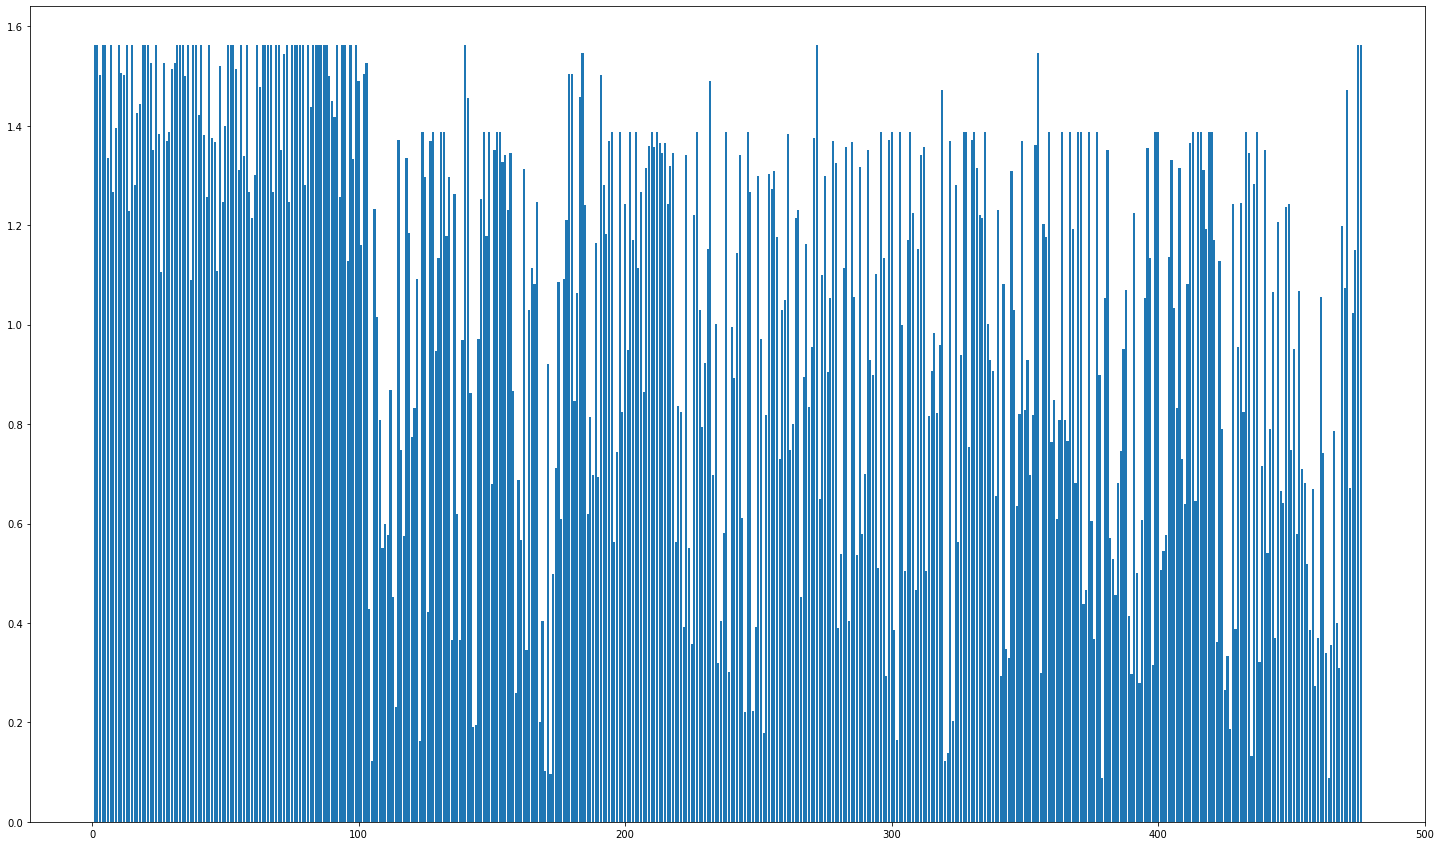

In [23]:
plt.figure(figsize=(25, 15))
plt.bar(x['position'], x['zscore_ASA'])
plt.show()

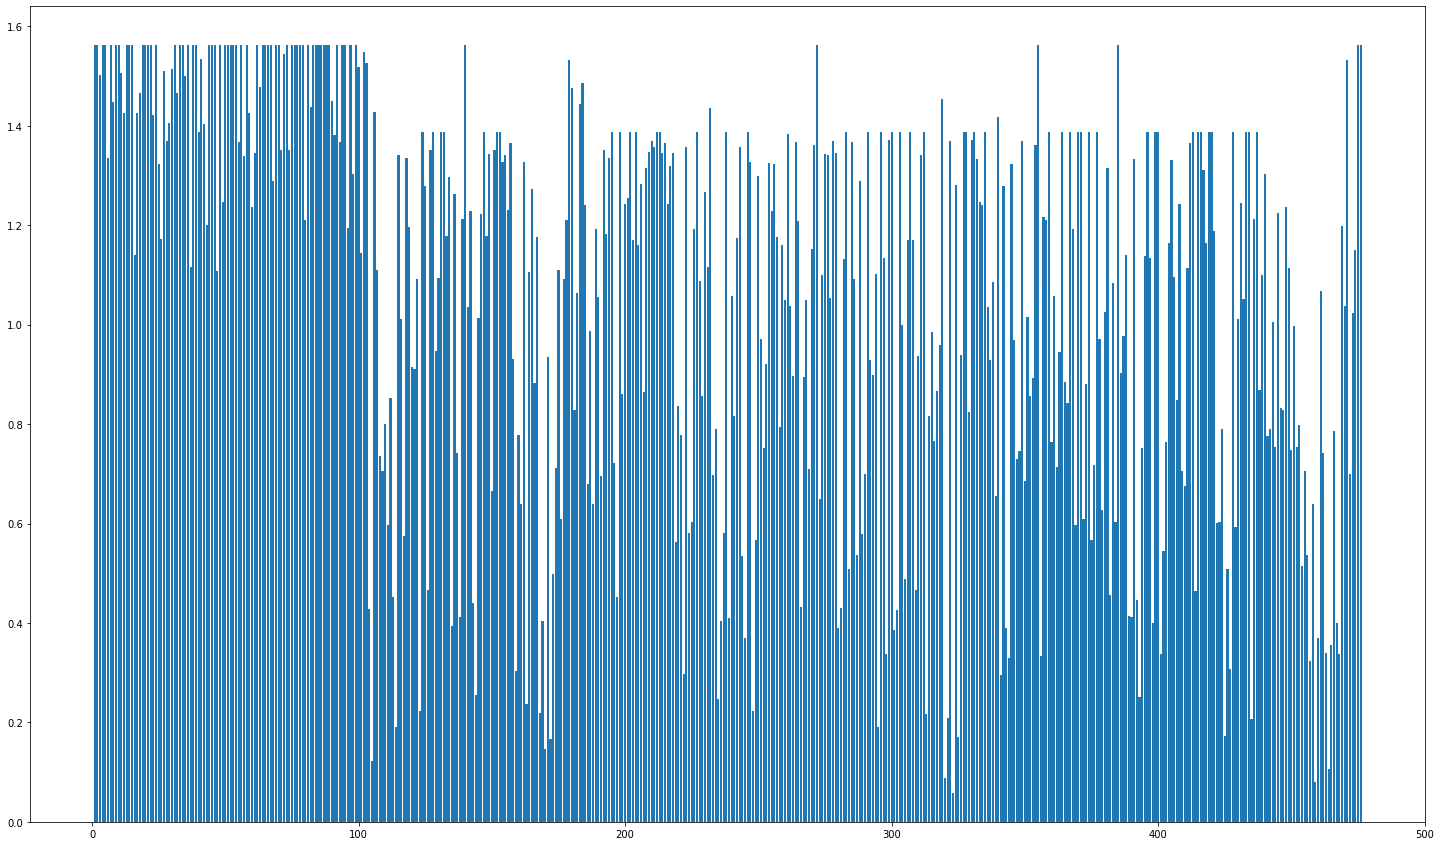

In [24]:
plt.figure(figsize=(25, 15))
plt.bar(y['position'], y['zscore_ASA'])
plt.show()

In [25]:
ss.kstest(x['zscore_ASA'], y['zscore_ASA'], alternative='two-sided')

KstestResult(statistic=0.007633053221288515, pvalue=0.996019162151687)

In [26]:
relevant_positions = [126,122,125,129,169,229,383,283,282]

Text(0, 0.5, 'Frequency')

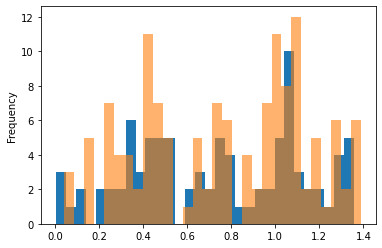

In [27]:
plt.hist(x[x['position'].isin(relevant_positions)]['zscore_ASA'], bins=30)
plt.hist(y[y['position'].isin(relevant_positions)]['zscore_ASA'], bins=30,alpha=0.6)
plt.ylabel('Frequency')

In [28]:
ss.kstest(x[x['position'].isin(relevant_positions)]['zscore_ASA'], y[y['position'].isin(relevant_positions)]['zscore_ASA'], alternative='two-sided')

KstestResult(statistic=0.07777777777777778, pvalue=0.882576368033847)

In [29]:
print(x[x['position'].isin(relevant_positions)].describe())
print(y[y['position'].isin(relevant_positions)].describe())

         position        ASA        fcr       ncpr  complexity  hydropathy  \
count   90.000000  90.000000  90.000000  90.000000   90.000000   90.000000   
mean   205.333333   0.314186   0.177778   0.037037    0.705951    0.448560   
std     89.237721   0.233352   0.175958   0.189911    0.029822    0.144274   
min    122.000000   0.010152   0.000000  -0.333333    0.612328    0.166667   
25%    126.000000   0.115385   0.000000   0.000000    0.676071    0.388889   
50%    169.000000   0.240513   0.200000   0.000000    0.722346    0.396296   
75%    282.000000   0.538344   0.400000   0.000000    0.722346    0.529630   
max    383.000000   0.739362   0.400000   0.333333    0.722346    0.729630   

       aggrescan_score  SCHBOND_count  BBHBond_count  COULOMBIC_count  \
count        90.000000           40.0           40.0        40.000000   
mean         -0.292067            0.0            0.0         2.950000   
std           1.069734            0.0            0.0         0.875595   
min  

# Pockets pds MICU1

In [30]:
pd.json_normalize(pockets_measurements['residues'])

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,"{'aa': 'VAL', 'position': 136}","{'aa': 'GLU', 'position': 144}","{'aa': 'PHE', 'position': 146}","{'aa': 'LYS', 'position': 174}","{'aa': 'ARG', 'position': 175}","{'aa': 'PHE', 'position': 176}","{'aa': 'ASP', 'position': 177}","{'aa': 'LYS', 'position': 180}","{'aa': 'GLU', 'position': 184}","{'aa': 'ARG', 'position': 185}",...,None,None,None,None,None,None,None,None,None,None
1,"{'aa': 'VAL', 'position': 153}","{'aa': 'THR', 'position': 157}","{'aa': 'PRO', 'position': 158}","{'aa': 'ASN', 'position': 159}","{'aa': 'GLU', 'position': 160}","{'aa': 'GLU', 'position': 311}","{'aa': 'ARG', 'position': 314}","{'aa': 'HIS', 'position': 315}","{'aa': 'GLY', 'position': 329}","{'aa': 'MET', 'position': 330}",...,None,None,None,None,None,None,None,None,None,None
2,"{'aa': 'GLU', 'position': 244}","{'aa': 'SER', 'position': 248}","{'aa': 'ARG', 'position': 251}","{'aa': 'SER', 'position': 252}","{'aa': 'GLY', 'position': 257}","{'aa': 'MET', 'position': 258}","{'aa': 'ARG', 'position': 259}","{'aa': 'HIS', 'position': 260}","{'aa': 'ARG', 'position': 261}","{'aa': 'ASP', 'position': 262}",...,None,None,None,None,None,None,None,None,None,None
3,"{'aa': 'SER', 'position': 207}","{'aa': 'ILE', 'position': 210}","{'aa': 'PHE', 'position': 211}","{'aa': 'PHE', 'position': 243}","{'aa': 'GLN', 'position': 247}","{'aa': 'ARG', 'position': 251}","{'aa': 'LEU', 'position': 270}","{'aa': 'GLY', 'position': 273}","{'aa': 'LEU', 'position': 274}","{'aa': 'CYS', 'position': 275}",...,None,None,None,None,None,None,None,None,None,None
4,"{'aa': 'PRO', 'position': 149}","{'aa': 'ALA', 'position': 189}","{'aa': 'ASP', 'position': 190}","{'aa': 'GLU', 'position': 191}","{'aa': 'GLY', 'position': 192}","{'aa': 'SER', 'position': 193}","{'aa': 'PHE', 'position': 195}","{'aa': 'GLU', 'position': 298}","{'aa': 'ARG', 'position': 301}","{'aa': 'LYS', 'position': 302}",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1546,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1547,"{'aa': 'ASP', 'position': 81}","{'aa': 'VAL', 'position': 82}","{'aa': 'CYS', 'position': 83}","{'aa': 'ASN', 'position': 84}","{'aa': 'HIS', 'position': 85}","{'aa': 'LYS', 'position': 340}","{'aa': 'LYS', 'position': 341}","{'aa': 'ALA', 'position': 344}","{'aa': 'MET', 'position': 345}","{'aa': 'ARG', 'position': 347}",...,None,None,None,None,None,None,None,None,None,None
1548,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


# Gráficos

In [ ]:


plt.bar()